## ** BLINKIT ANALYSIS **

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("E:/Data Analysis/Blinkit Analysis/blinkit_data.csv")

In [11]:
df.head(20)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [12]:
print("Size of data ", df.shape)

Size of data  (8523, 12)


In [13]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [14]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [18]:
print("Columns in DataFrame:")
print(df.columns.tolist())

Columns in DataFrame:
['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']


In [22]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']


In [26]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [27]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    "LF": "Low Fat",
    "low fat": "Low Fat",
    "reg": "Regular"
})


In [28]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


In [29]:
# Total Sales
total_sales = df['Sales'].sum()

# Average Sales
avg_sales = df['Sales'].mean()

# No of Items Sold
no_of_items_sold = df['Sales'].count()

# Average Ratings
avg_ratings = df['Rating'].mean()

# Display
print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.0f}")
print(f"No of Items Sold: {no_of_items_sold:,}")
print(f"Average Ratings: {avg_ratings:.2f}")


Total Sales: $1,201,681
Average Sales: $141
No of Items Sold: 8,523
Average Ratings: 3.97


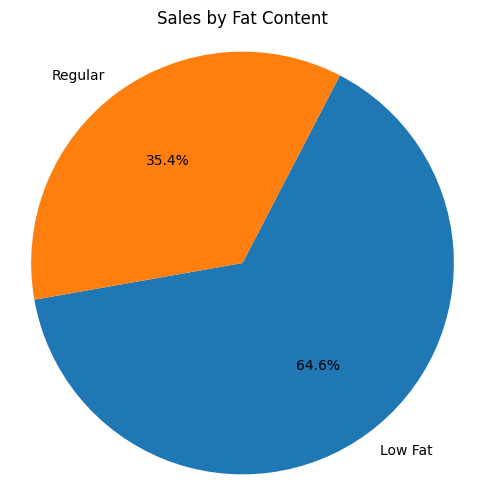

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.figure(figsize=(6, 6))  
plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%.1f%%',
    startangle=190
)
plt.title('Sales by Fat Content')
plt.axis('equal')  
plt.show()


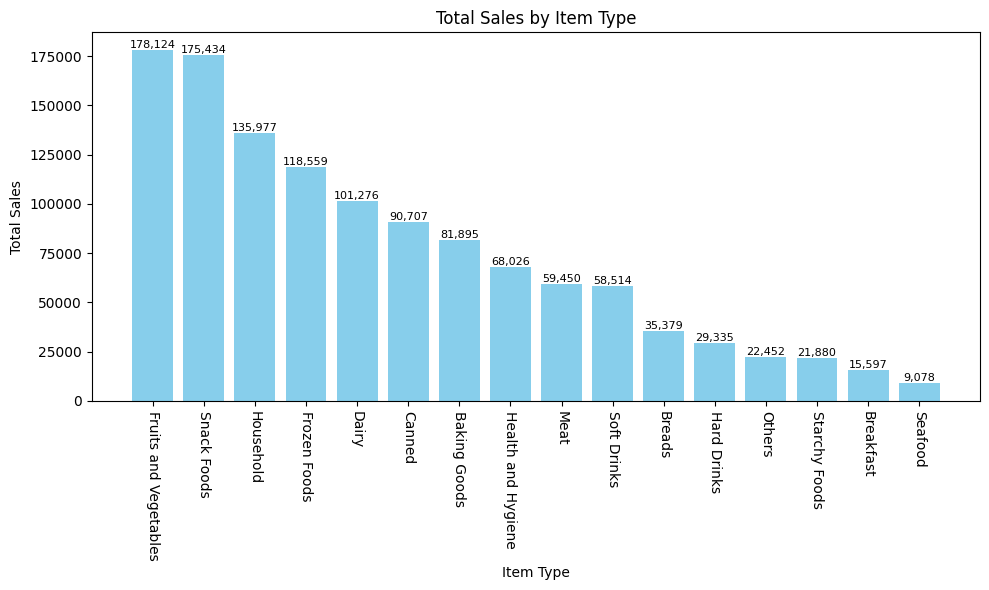

In [31]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values, color='skyblue')

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


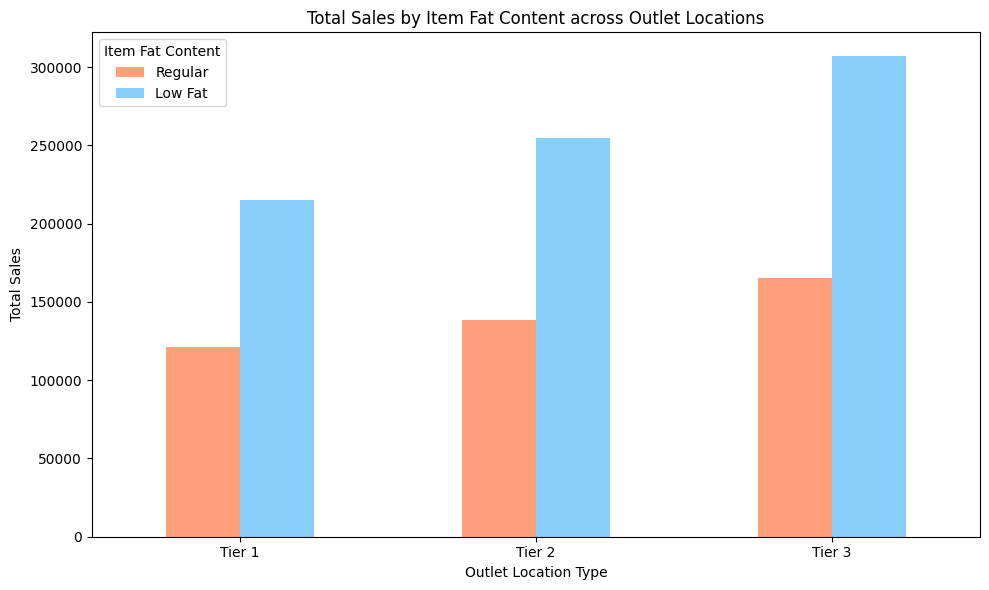

In [32]:
# Group by Outlet Location Type and Item Fat Content, then sum Sales
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

# Optional: filter to focus only on Regular and Low Fat
grouped = grouped[['Regular', 'Low Fat']]

# Plotting
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['#FFA07A', '#87CEFA'])
plt.title('Total Sales by Item Fat Content across Outlet Locations')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


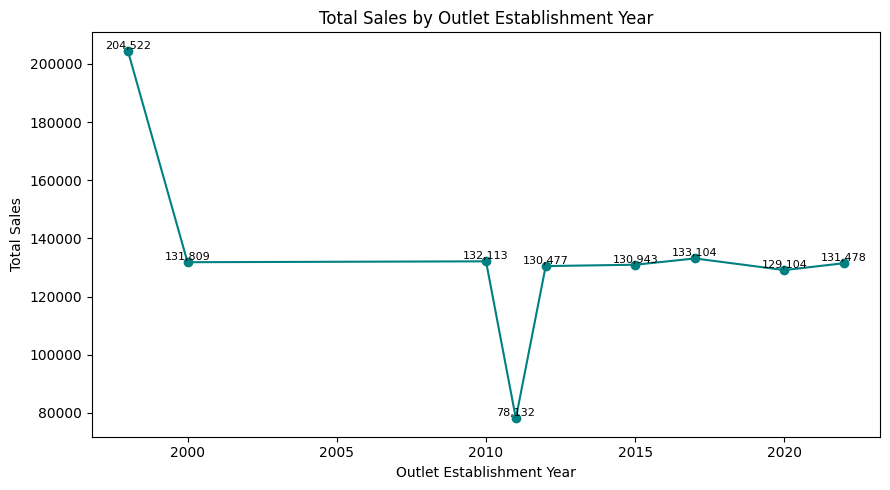

In [33]:
# Grouping and sorting sales by Outlet Establishment Year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-', color='teal')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Annotate data points on the line
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


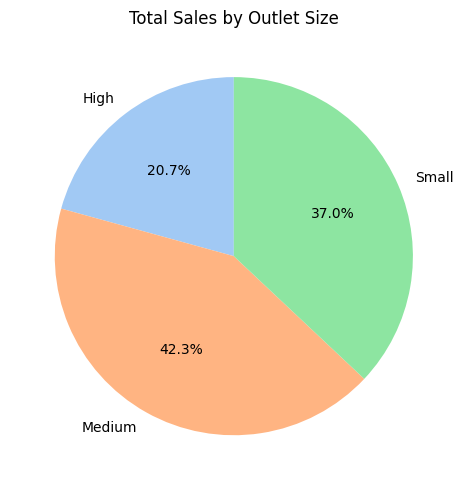

In [34]:
# Grouping total sales by Outlet Size
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')[0:len(sales_by_size)]
)
plt.title('Total Sales by Outlet Size')
plt.tight_layout()
plt.show()


C:\Users\ABCD\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ABCD\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ABCD\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


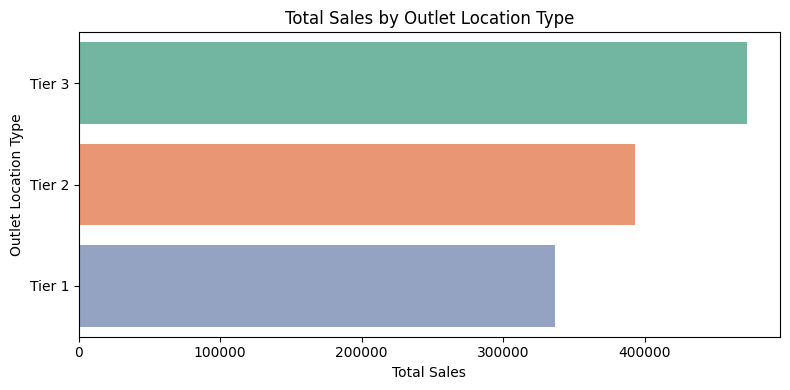

In [35]:
# Grouping and sorting sales by Outlet Location Type
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

# Plotting
plt.figure(figsize=(8, 4))  # Wider chart for better readability
sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location, palette='Set2')

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()  # Ensures layout fits properly

plt.show()
